In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import misc
from skimage import io

import time

Let's do some setup and  load in image 

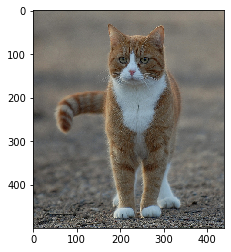

Image size: (500, 439, 3)


In [7]:
img = io.imread('cat.png').astype(np.float)/255
#plt.figure()
plt.imshow(img)
plt.show()
start = time.time()
#out1 = sobel_filter(img)
#out2 = blur_filter(img)
#print('Calculation time:', time.time()-start, 'sec')
print('Image size:',img.shape)

Now, implement convolution of image of NxM pixels and C spectral bands (C=3 for a RGB image) 
with a filter kernel of size Nk x Mk. THis image has 500*439pixels and 3 band since it is a colour image. 

To compute the result of pixel (i,j,c), place the filter kernel at pixel (i,j,c) and multiply the image and the filter at all locations where the filter overlaps the image, then sum the result. 
This sum can be computed using np.sum, or you can use 2 for-loops (this will be slower).

To compute the result of all pixels we need a for loop over all the indexes, in this case three for loops over image width (N), height (M) and number of channels (C). 

In this example we compute convolution only at those pixels where the filter kernel fits inside the image. 

First, implement convolution_loops where you in addition to the 3 outer loops also loop over the filter kernel.  See lecture notes for formula. 


In [76]:
def convolution_loops(image, kernel):
  """
  Write a general function to convolve an image with an arbitrary kernel.
  """
  out = np.zeros(image.shape)
  ##Your code here
  print(image.shape)
  kernel = kernel[::-1, ::-1] #Flipping kernel to follow convention
  kernel_size = kernel.shape[0]
  border = kernel_size//2
  
  ny, nx, nc = image.shape
  
  for c in range(nc):
     for x in range(border, nx-border):
         for y in range(border, ny-border):
             cumsum = 0
             for k in range(-border, border):
                 for l in range(-border, border):
                     cumsum += image[y-l, x-k, c]*kernel[k,l]
                    
             out[y,x] = cumsum
  

  return out



Now, replace the loop over the filter kernel by using either np.sum or np.dot (the latter after reshaping the current subwindow and the filter into a 1D vectors of length (1,Nk*Mk) 

In [77]:
def convolution(image, kernel):
  """
  Write a general function to convolve an image with an arbitrary kernel.
  """
  out = np.zeros(image.shape)
   ## Your code here
  print(image.shape)
  kernel = kernel[::-1, ::-1] #Flipping kernel to follow convention
  kernel_size = kernel.shape[0]
  border = kernel_size//2
  
  ny, nx, nc = image.shape
  
  for c in range(nc):
     for x in range(border, nx-border):
         for y in range(border, ny-border):
                    
            out[y, x, c] = np.sum(image[y-border:y + border+1, x-border:x + border+1, c]*kernel)
  
  
  return out

(500, 439, 3)
Calculation time loops: 38.905481576919556 sec
(500, 439, 3)
Calculation time without inner lopps: 6.528067588806152 sec


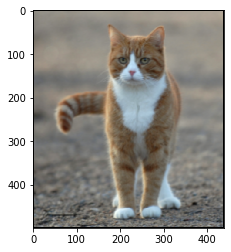

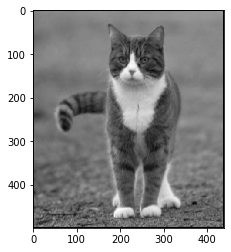

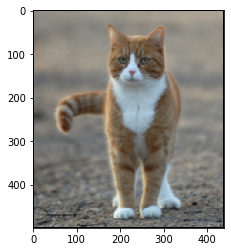

In [78]:
# CHeck that your image looks correct with a given artbitraty filter
img = plt.imread('cat.png')

kernel = np.arange(25).reshape((5, 5))

start= time.time()
out1 = convolution_loops(img, kernel)

#out1 = sobel_filter(img)
#out2 = blur_filter(img)
print('Calculation time loops:', time.time()-start, 'sec')

start= time.time()
out2 = convolution(img, kernel)

#out1 = sobel_filter(img)
#out2 = blur_filter(img)
print('Calculation time without inner lopps:', time.time()-start, 'sec')


out1 -= out1.min()
out1 /= out1.max()
out2 -= out2.min()
out2 /= out2.max()



correct = plt.imread('convolution_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out1, vmin=out1.min(), vmax=out1.max())
plt.show()
plt.figure()
plt.imshow(out2, vmin=out2.min(), vmax=out2.max())
plt.show()


In [79]:
def blur_filter(img):
  """
  Use your convolution function to filter your image with an average filter (box filter)
  with kernel size of 11. The filter should have coefficients 1/(k_size*k_size)
  """
  k_size = 11
  kernel = np.ones((k_size, k_size))/k_size**2
  return convolution(img, kernel)


(500, 439, 3)


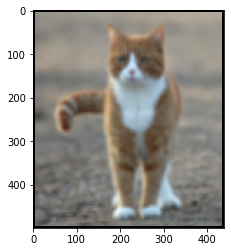

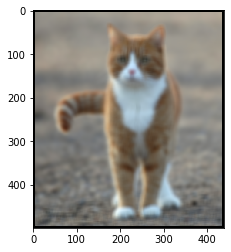

In [80]:
# Check your blurred image 
img = plt.imread('cat.png').astype(np.float) / 255
out = blur_filter(img)
out -= out.min()
out /= out.max()

correct = plt.imread('blur_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out, vmin=out.min(), vmax=out.max())
plt.show()

In [81]:
def sobel_filter(img):
  """
  Use your convolution function to filter your image with a vertical sobel kernel to find vertical edges
  """
  sobel_y = [[1, 2, 1],
            [0, 0, 0],
            [-1, -2, -1]]
  sobel_x = [[1, 0, -1 ],
            [2, 0, -2],
            [1, 0, -1]]
  sobel_y = np.array(sobel_y)
  sobel_x = np.array(sobel_x)
  # Your code here
  out = np.zeros(img.shape)
  convx = convolution(img, sobel_x)
  convy = convolution(img, sobel_y)
  out = np.sqrt(convx*convx + convy*convy)
    
    
    
  return out





In [ ]:
# Check the sobel image 
out = sobel_filter(img)
out -= out.min()
out /= out.max()
correct = plt.imread('sobel_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out, vmin=out.min(), vmax=out.max())
plt.show()

(500, 439, 3)
(500, 439, 3)
